#### We find min rmse = 0.34 witk k = 14
see end of the notebook

In [9]:
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy.linalg import svd 
from sklearn import metrics
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [6]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
df.shape

(4803, 20)

In [7]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [53]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [10]:
df.iloc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                        150.438
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [17]:
for i in df['genres'][:5]:
    print(i)

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]
[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]
[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]
[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]


In [23]:
for i in df['keywords'][:2]:
    print(i)

[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]
[{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one's life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck

In [21]:
df['id'].nunique(),df.shape, df['original_title'].nunique(),df['title'].nunique()

(4803, (4803, 20), 4801, 4800)

In [26]:
df['original_title'].isna().sum()

0

In [32]:
df.groupby('original_title')['id'].count()[df.groupby('original_title')['id'].count() != 1]

original_title
Batman             2
Out of the Blue    2
Name: id, dtype: int64

In [ ]:
#### Batman, out of the Blue have two id .....HOW ??

In [33]:
df[df['original_title'] == 'Batman'] ## Release_datas are not same mean these are like part or type.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [35]:
df[df['original_title'] == 'Out of the Blue'] ## Release_datas are not same mean these are like part or type.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18


In [36]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [46]:
list(filter(lambda x : len(x) == 0, df['genres']))

[]

In [24]:
df['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [25]:
df['original_language'].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
ar       2
cs       2
ta       2
id       2
ro       2
te       1
nb       1
pl       1
no       1
vi       1
xx       1
el       1
sl       1
ps       1
is       1
ky       1
tr       1
af       1
hu       1
Name: original_language, dtype: int64

In [135]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [98]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [178]:
# https://stackoverflow.com/questions/14814186/python-splitting-by-certain-pattern
eval ("[%s]" % df['genres'][0])

[[{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 878, 'name': 'Science Fiction'}]]

#### Total movies in each genre

In [221]:
l =[]
for i in range(max(df.shape)):
    for j in eval ("[%s]" % df['genres'][i])[0]:
        l.append(j['name'])
set(l)

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [222]:
genre_type = {}
genre_type.update(dict.fromkeys(list(set(l)), 0))
genre_type

{'Action': 0,
 'Adventure': 0,
 'Animation': 0,
 'Comedy': 0,
 'Crime': 0,
 'Documentary': 0,
 'Drama': 0,
 'Family': 0,
 'Fantasy': 0,
 'Foreign': 0,
 'History': 0,
 'Horror': 0,
 'Music': 0,
 'Mystery': 0,
 'Romance': 0,
 'Science Fiction': 0,
 'TV Movie': 0,
 'Thriller': 0,
 'War': 0,
 'Western': 0}

#### These are count of genre

In [177]:
for i in range(max(df.shape)):
    for j in eval ("[%s]" % df['genres'][i])[0]:
        genre_type[j['name']]+=1
genre_type

{'Action': 1155,
 'Adventure': 791,
 'Animation': 234,
 'Comedy': 1722,
 'Crime': 696,
 'Documentary': 110,
 'Drama': 2297,
 'Family': 513,
 'Fantasy': 425,
 'Foreign': 34,
 'History': 197,
 'Horror': 519,
 'Music': 185,
 'Mystery': 348,
 'Romance': 894,
 'Science Fiction': 536,
 'TV Movie': 8,
 'Thriller': 1274,
 'War': 144,
 'Western': 82}

In [193]:
pd.DataFrame([genre_type.keys(), genre_type.values()]).T.sort_values(1, ascending = False)

,0,1
6,Drama,2297
11,Comedy,1722
4,Thriller,1274
19,Action,1155
10,Romance,894
0,Adventure,791
16,Crime,696
3,Science Fiction,536
2,Horror,519
5,Family,513


In [252]:
top_five_genre = ['Drame','Comedy','Thriller','Action','Romance']

In [194]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [238]:
## Initialize keys of default dict => d = defaultdict(list, { k:[] for k in genre_type })
from collections import defaultdict
d = defaultdict(list, { k:[] for k in genre_type })
d

defaultdict(list,
            {'Action': [],
             'Adventure': [],
             'Animation': [],
             'Comedy': [],
             'Crime': [],
             'Documentary': [],
             'Drama': [],
             'Family': [],
             'Fantasy': [],
             'Foreign': [],
             'History': [],
             'Horror': [],
             'Music': [],
             'Mystery': [],
             'Romance': [],
             'Science Fiction': [],
             'TV Movie': [],
             'Thriller': [],
             'War': [],
             'Western': []})

In [239]:
for i in range(max(df.shape)):
    for j in eval ("[%s]" % df['genres'][i])[0]:
        d[j['name']].append(1)
    break
d

defaultdict(list,
            {'Action': [1],
             'Adventure': [1],
             'Animation': [],
             'Comedy': [],
             'Crime': [],
             'Documentary': [],
             'Drama': [],
             'Family': [],
             'Fantasy': [1],
             'Foreign': [],
             'History': [],
             'Horror': [],
             'Music': [],
             'Mystery': [],
             'Romance': [],
             'Science Fiction': [1],
             'TV Movie': [],
             'Thriller': [],
             'War': [],
             'Western': []})

#### Creating DataFrame:- Based on Top 5 genre
top_five_genre = ['Drame','Comedy','Thriller','Action','Romance']

In [270]:
df.drop_duplicates('original_title', inplace = True)
df.reset_index(inplace = True)
df.shape

(4801, 21)

In [271]:
# for i in range(max(df.shape)):
#     for j in eval ("[%s]" % df['genres'][i])[0]:
#         print(i,j['name'])
df.head(1)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [275]:
movie = []
genre = []
for i in range(max(df.shape)):
    for j in eval ("[%s]" % df['genres'][i])[0]:
            movie.append(df['original_title'][i])
            genre.append(j['name'])

In [314]:
df_rec = pd.DataFrame({'original_title':movie, 'genre':genre})
df_rec.shape,df_rec.isna().sum(), df_rec.head(1)

((12154, 2), genre             0
 original_title    0
 dtype: int64,     genre original_title
 0  Action         Avatar)

In [315]:
df_recomm =  df[['original_title','original_language', 'overview', 'popularity', 'release_date', 'runtime','tagline','vote_average', 'vote_count']]

In [316]:
df_rec = pd.merge(df_rec, df_recomm, on = 'original_title')
df_rec.head(1)

,genre,original_title,original_language,overview,popularity,release_date,runtime,tagline,vote_average,vote_count
0,Action,Avatar,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Enter the World of Pandora.,7.2,11800


In [ ]:
# Calculating the Weighted Rating

####
Calculating the Weighted Rating (using the IMDB formula)
IMDB (please remember that we are working with TMDB data after the takedown request by IMDB) 
does not use the plain movie vote_averages as the score to for instance compose its Top250. 
Instead,it uses a formula that also takes the number of votes into account. The formula 
is (source Wikipedia):

                        W=(R∗v+C∗m)/(v+m)
Where:

#### W = weighted rating
#### R = average rating for the movie as a number from 1 to 10 (vote_average)
#### v = number of votes for the movie (vote_count)
#### m = minimum votes required to be listed in the Top 250 (currently 25,000)
#### C = the mean vote across the whole report
C is 6.09 for this dataset. For C, I am taking the 75% quantile.

C = 6.09,
m = 0.75

In [321]:
C = 6.09
m = 0.75
R = df_rec['vote_average']
v = df_rec['vote_count']
df_rec['rating'] = ((R*v) + (C*m))/ (v*m)
df_rec.head(1)

,genre,original_title,original_language,overview,popularity,release_date,runtime,tagline,vote_average,vote_count,rating
0,Action,Avatar,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Enter the World of Pandora.,7.2,11800,9.600516


In [330]:
df_rec.shape

(12154, 11)

In [331]:
df_rec.head(1)

,genre,original_title,original_language,overview,popularity,release_date,runtime,tagline,vote_average,vote_count,rating
0,Action,Avatar,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Enter the World of Pandora.,7.2,11800,9.600516


In [329]:
df_rec.to_csv('Recomm.csv', index = False)

In [310]:
200*'*'

'********************************************************************************************************************************************************************************************************'

#### Simple recommendations based on selected genre and language:-
I want top five 'Action' movie in english.....
I composed a function that recommends 5 similar movies for a movie. What I am doing is to sort all other movies based on:
    1. The number of similarities (same director, same actors, same genres).
    2. When the number of similarities is the same for a number of movies, I am sorting them on descending weighted rating.

In [311]:
200*'*'

'********************************************************************************************************************************************************************************************************'

In [94]:
df_rec = pd.read_csv('Recomm.csv')

In [95]:
df_rec[(df_rec['genre']=='Action') & (df_rec['original_language'] == 'en')].sort_values('rating',ascending = False)['original_title'][:5]

11557                  Hav Plenty
12085     The Legend of God's Gun
11972              Heroes of Dirt
11841    Amidst the Devil's Wings
6705               One Man's Hero
Name: original_title, dtype: object

In [96]:
df_rec.head(1)

,genre,original_title,original_language,overview,popularity,release_date,runtime,tagline,vote_average,vote_count,rating
0,Action,Avatar,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Enter the World of Pandora.,7.2,11800,9.600516


In [97]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,total_user
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,4


#### How many people(id) are at there and which user viwed which movie:-

In [98]:
id_ = []
for i in range(max(df.shape)):
    temp = eval(df['genres'][i])
    for j in range(len(temp)):
        id_.append(temp[j]['id'])
len(set(id_)), 10*'*', set(id_)

(20,
 '**********',
 {12,
  14,
  16,
  18,
  27,
  28,
  35,
  36,
  37,
  53,
  80,
  99,
  878,
  9648,
  10402,
  10749,
  10751,
  10752,
  10769,
  10770})

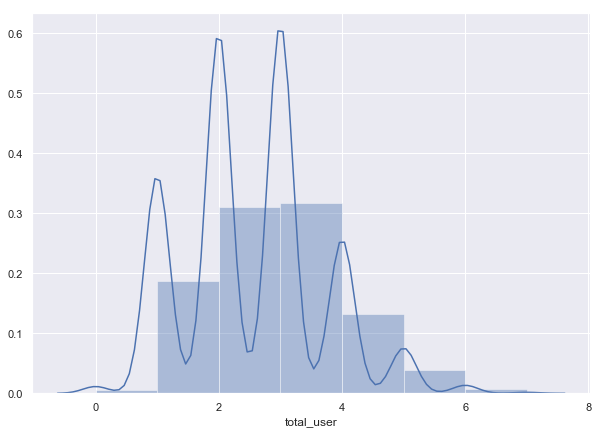

In [99]:
total_user = []
for i in range(max(df.shape)):
    temp = eval(df['genres'][i])
    total_user.append(len(temp))
df['total_user'] = total_user

## Plot
plt.figure(figsize= (10,7))
sns.distplot(df['total_user'], bins=7)

In [100]:
df['total_user'].mean(), df['total_user'].median(), df['total_user'].mode()

(2.53175098896523, 2.0, 0    3
 dtype: int64)

In [101]:
df['total_user'].max(), df['total_user'].min()

(7, 0)

### Higley sparce data we have 4803 movies but normaly 2 to 4 viewer per movie 

In [102]:
from collections import defaultdict
dict_ = defaultdict(list, {k:[] for k in set(df['original_title'])})

for i in range(max(df.shape)):
    temp_title = df['original_title'][i]
    temp_id = eval(df['genres'][i])
    for element in range(len(temp_id)):
        dict_[temp_title].append(temp_id[element]['id'])
dict_

defaultdict(list,
            {'Mine vaganti': [35, 18, 10749],
             'Where the Heart Is': [35, 18, 10749],
             'Harold & Kumar Escape from Guantanamo Bay': [35, 12],
             'Censored Voices': [36, 99],
             'Perfume: The Story of a Murderer': [80, 14, 18],
             'Miss Potter': [18, 10751, 10749],
             'As Good as It Gets': [35, 10749],
             'How the Grinch Stole Christmas': [10751, 35, 14],
             'Jackass: The Movie': [99, 35],
             'Be Cool': [35, 80],
             'Trucker': [18],
             'The Runaways': [18, 10402],
             'Irréversible': [18, 53, 80, 9648],
             'Noah': [18, 12],
             'The Kentucky Fried Movie': [35],
             'Pale Rider': [10749, 37],
             'The Imitation Game': [36, 18, 53, 10752],
             'Star Trek Into Darkness': [28, 12, 878],
             "National Lampoon's Vacation": [35, 12, 10749],
             'Firestarter': [14, 18, 27, 28, 53],
           

In [103]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,total_user
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,4


### Utility matrix conversion:-

In [104]:
user_item_df = pd.DataFrame(columns = list(sorted(set(id_))))
user_item_df['movie'] = df['original_title']
user_item_df.fillna(0,inplace = True)
user_item_df.head(3)

,12,14,16,18,27,28,35,36,37,53,...,99,878,9648,10402,10749,10751,10752,10769,10770,movie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Avatar
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pirates of the Caribbean: At World's End
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spectre


In [105]:
user_item_df.shape

(4803, 21)

### implicit rating
1 - user viewed this movie,
0 - user not viewed this movie    

In [106]:
for i in range(max(df.shape)):
    movie = df['original_title'][i]
    temp = eval(df['genres'][i])
    for j in range(len(temp)):
        user_item_df.loc[i,temp[j]['id']] = 1

#### User-Item matrix because at here users are only 40 that's i made it in this manner:-

In [107]:
user_item_df.head()

,12,14,16,18,27,28,35,36,37,53,...,99,878,9648,10402,10749,10751,10752,10769,10770,movie
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Avatar
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pirates of the Caribbean: At World's End
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spectre
3,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,The Dark Knight Rises
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,John Carter


#### Item-User matrix where we have 4803 total movies which arrange in nu(0-4803) formate:-

In [108]:
user_item_df = user_item_df.T
user_item_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
12,1,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
14,1,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [109]:
user_item_df.rename(columns = user_item_df.loc['movie'],inplace = True)
user_item_df.tail()

,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
10751,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
movie,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew


In [110]:
user_item_df.drop('movie', axis = 0, inplace= True)
user_item_df.tail()

,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
10749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
10751,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [111]:
user_item_df.head(3)

,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
12,1,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
14,1,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
user_item_df.shape

(20, 4803)

#### Calculated Sparcity:-
Number of rating / Total number of elements

In [113]:
# Calculate total zero and one in df
# 1. (user_item_df == 0).astype(int).sum()
# 2. user_item_df.isin([0]).sum().values -- It's Fast

In [115]:
user_item_df.isin([0]).sum().sum()

83900

In [116]:
user_item_df.isin([1]).sum().sum()

12160

In [117]:
12160 / (12160+83900)  # around 12 percent data is rated only......

0.1265875494482615

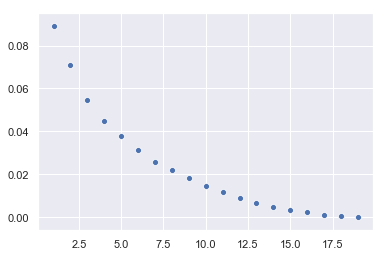

In [118]:
error = []
for i in range(1,min(user_item_df.shape)): 
    U, sigma, vt = svds(csc_matrix(user_item_df, dtype = float), k = i)
    sigma = np.diag(sigma)
    C_dash = np.dot(np.dot(U,sigma),vt)
    error.append(metrics.mean_squared_error(user_item_df,C_dash))
sns.scatterplot(list(range(1,min(user_item_df.shape))), error)

In [119]:
#https://beckernick.github.io/matrix-factorization-recommender/
# If I wanted to put this kind of system into production, I’d want to create a training and
# validation set and optimize the number of latent features (k) by minimizing the Root Mean Square 
# Error. Intuitively, the Root Mean Square Error will continuously decrease on the training set as k
# increases (because I’m approximating the original ratings matrix with a higher rank matrix). 
# On the validation set, however, the error will eventually start increasing because the training 
# set is an overfit representation of user tastes.

In [120]:
# Total user viewed movie:-
user_item_df.sum(axis = 1).astype(int)

12        790
14        424
16        234
18       2297
27        519
28       1154
35       1722
36        197
37         82
53       1274
80        696
99        110
878       535
9648      348
10402     185
10749     894
10751     513
10752     144
10769      34
10770       8
dtype: int32

#### Normalize the dataframe

In [121]:
user_item_df = user_item_df.T/user_item_df.sum(axis = 1)
user_item_df = user_item_df.T

######
#Because df.sum() give column vise sum and we want row vise and then we df.sum(axis = 1)
#pd.DataFrame({'a':[4,5,6], 'b': [8,5,3]})
#pd.DataFrame({'a':[4,5,6], 'b': [8,5,3]}).T/pd.DataFrame({'a':[4,5,6], 'b': [8,5,3]}).sum(axis = 1)
#####

In [122]:
# apply fuction gives row vise by default:-
# pd.DataFrame({'a':[4,5,6], 'b': [8,5,3]})
# pd.DataFrame({'a':[4,5,6], 'b': [8,5,3]}).apply(lambda x: x+2, axis = 1)
# pd.DataFrame({'a':[4,5,6], 'b': [8,5,3]}).apply(lambda x: x+2, axis = 0)

In [125]:
user_item_df.to_csv('user_item_df', index = False) ## user_id become 1 to 20

In [126]:
user_item_df = pd.read_csv('user_item_df')
user_item_df.head(1)

,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
0,0.001266,0.001266,0.001266,0.0,0.001266,0.001266,0.0,0.001266,0.001266,0.001266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#### Because sparcity is too high that's why it like pred = real 

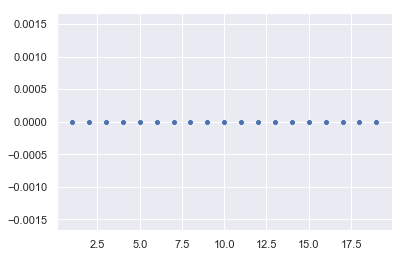

In [128]:
error = []
for i in range(1, min(user_item_df.shape)):
    U, sigma, vt = svds(csc_matrix(user_item_df, dtype = float), k = i)
    sigma = np.diag(sigma)
    C_dash = np.dot(np.dot(U,sigma),vt)
    error.append(metrics.mean_squared_error(user_item_df,C_dash))
sns.scatterplot(list(range(1,min(user_item_df.shape))), error)

In [244]:
U, sigma, vt = svds(csc_matrix(user_item_df, dtype = float), k = 19)
sigma = np.diag(sigma)
C_dash = np.dot(np.dot(U,sigma),vt)
int(metrics.mean_squared_error(user_item_df,C_dash))

0

#### How many movies has zero viwer still today(when data is taken)

In [165]:
user_item_df = user_item_df.apply(lambda x : np.ceil(x))

In [167]:
for x,y in user_item_df.iterrows():
    print(x,y)
    break

0 Avatar                                      1.0
Pirates of the Caribbean: At World's End    1.0
Spectre                                     1.0
The Dark Knight Rises                       0.0
John Carter                                 1.0
                                           ... 
El Mariachi                                 0.0
Newlyweds                                   0.0
Signed, Sealed, Delivered                   0.0
Shanghai Calling                            0.0
My Date with Drew                           0.0
Name: 0, Length: 4803, dtype: float64


In [219]:
# for i in user_item_df.columns:
#     print(np.where(user_item_df[i] == 1))

#### Custom lost function and SVD ~>
#we take only that movie-user pair whose we have implicit rating, and find rmse respective them

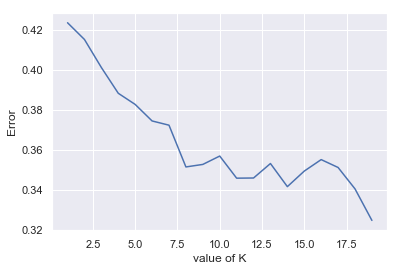

In [259]:
# SVD
error = []
for i in range(1, min(user_item_df.shape)):
    U, sigma, vt = svds(csc_matrix(user_item_df, dtype = float), k = i)
    sigma = np.diag(sigma)
    C_dash = np.dot(np.dot(U,sigma),vt)
    
    # Calculate RMSE by custom lost fuction
    C_dash_df = pd.DataFrame(C_dash.astype(int), columns = user_item_df.columns)
    temp = 0
    total_rated = 0
    for row, columns in user_item_df.iterrows():
        for element in value[value == 1].index: ## Take only that movie-user whose rating we have
            temp += (C_dash_df.loc[row, element] - user_item_df.loc[row, element])**2
            total_rated += 1
            
#     print(np.sqrt(temp/total_rated))
    error.append(np.sqrt(temp/total_rated))

# Plot
plt.xlabel('value of K')
plt.ylabel('Error')
sns.lineplot(list(range(1,min(user_item_df.shape))), error)

In [ ]:
# As always value of k is incressing and error is decressing so at max value of error is min
# Which is that's why error.......Overfitting....We will work on it by more EDA and Feature 
# abstraction and imrove rating method and because sparcity is too too high only 12 persent data
# is rated

## ****************************************************
### Here we consider k = 14 where RMSE is approx 0.34
## ****************************************************